┌ Info: Found initial step size
└   ϵ = 1.6
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


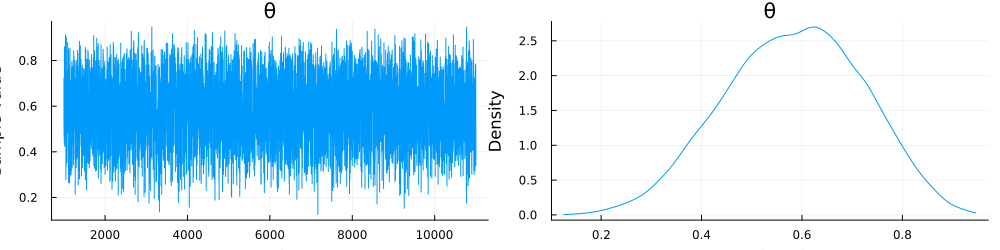

In [41]:
# 必要なパッケージを追加
using Turing
using StatsPlots


# モデルの定義と実行（あなたの既存コード）
@model function bernoulli_model(data)
    θ ~ Beta(1, 1)
    data .~ Bernoulli(θ)
end

# thetaの真の値は0.6
data = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
model = bernoulli_model(data)
chain = sample(model, NUTS(), 10000)

# 事後分布のプロット
plot(chain)  # チェーン全体の可視化


In [42]:
# 推定されたθの値
θ_estimated = mean(chain[:θ])
print(θ_estimated)

0.583476591074294

In [43]:
# Θ=0.6という条件からデータを生成してみる
true_θ = 0.6
n_samples = 100

data = rand(Bernoulli(true_θ), n_samples)
print(data)

Bool[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]

┌ Info: Found initial step size
└   ϵ = 0.8
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


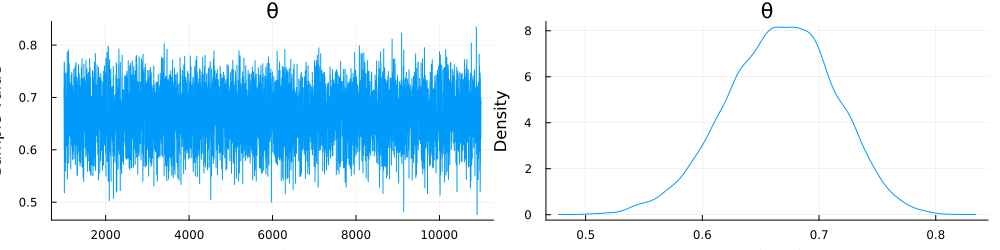

In [44]:
model = bernoulli_model(data)
chain = sample(model, NUTS(), 10000)

# 事後分布のプロット
plot(chain)  # チェーン全体の可視化

In [45]:
# 推定されたθの値
θ_estimated = mean(chain[:θ])
print(θ_estimated)

0.6669338025768841